In [139]:
import tensorflow
import pandas as pd
import numpy as np
from sklearn import model_selection, preprocessing
from sklearn.neighbors import KNeighborsClassifier
from matplotlib import style
from matplotlib import pyplot as plt
import pickle
from sklearn import svm
from sklearn import metrics

ImportError: cannot import name 'train_test_split'

In [135]:
cols =['buying','maint','doors','person','lug_boot','safety','class']
df = pd.read_csv("car.data", names = cols)
df.head(5)

,buying,maint,doors,person,lug_boot,safety,class
0,vhigh,vhigh,2,2,small,low,unacc
1,vhigh,vhigh,2,2,small,med,unacc
2,vhigh,vhigh,2,2,small,high,unacc
3,vhigh,vhigh,2,2,med,low,unacc
4,vhigh,vhigh,2,2,med,med,unacc


In [136]:
le = preprocessing.LabelEncoder()
buying = le.fit_transform(np.array(df["buying"]))
maint = le.fit_transform(np.array(df["maint"]))
lug_boot = le.fit_transform(np.array(df["lug_boot"]))
doors = le.fit_transform(np.array(df["doors"]))
person = le.fit_transform(np.array(df["person"]))
safety = le.fit_transform(np.array(df['safety']))
cls = le.fit_transform(np.array(df["class"]))
#df["person"].astype(str).astype(int)
# len(df[df["doors"] =="5more"])

In [137]:
a = list(zip(buying,maint,lug_boot,doors,person,safety))
x = np.array(a)
y = np.array(cls)
x


array([[3, 3, 2, 0, 0, 1],
       [3, 3, 2, 0, 0, 2],
       [3, 3, 2, 0, 0, 0],
       ...,
       [1, 1, 0, 3, 2, 1],
       [1, 1, 0, 3, 2, 2],
       [1, 1, 0, 3, 2, 0]])

In [75]:
x_train, x_test, y_train, y_test = model_selection.train_test_split(x,y,test_size = 0.1)

In [77]:
model = KNeighborsClassifier(n_neighbors = 7)
model.fit(x_train,y_train)
acc = model.score(x_test,y_test)
acc

0.9421965317919075

In [94]:
name = df["class"].unique()

In [111]:
g =y_test[:10]
f = model.predict(x_test)
# conpare the x_test, the predict and the actually reslut (y_test)
for x in range(len(f)):
    print(x_test[x], name[f[x]],name[y_test[x]])

[3 3 2 3 1 2] vgood vgood
[2 0 0 2 1 1] vgood vgood
[0 1 1 1 2 2] vgood unacc
[2 2 0 0 1 0] unacc good
[1 3 0 0 2 0] unacc unacc
[2 0 0 1 2 2] unacc unacc
[2 2 0 1 1 0] good good
[2 0 0 1 1 0] unacc unacc
[0 0 2 1 2 0] unacc unacc
[2 0 0 0 2 2] unacc unacc
[2 2 2 0 2 1] vgood vgood
[3 3 2 2 2 0] vgood vgood
[0 0 0 3 2 1] vgood vgood
[1 2 1 0 1 1] vgood vgood
[2 1 0 1 2 2] acc acc
[2 0 1 3 0 2] vgood vgood
[3 1 1 0 0 1] vgood vgood
[2 0 0 3 0 0] vgood vgood
[1 0 1 3 0 0] vgood vgood
[3 2 2 3 1 2] vgood vgood
[2 3 2 2 2 0] unacc unacc
[3 0 0 3 0 2] vgood vgood
[1 2 0 3 0 2] vgood vgood
[0 3 0 2 0 2] vgood vgood
[2 3 0 3 0 0] vgood vgood
[2 2 1 1 0 2] vgood vgood
[1 2 1 3 0 0] vgood vgood
[0 2 2 2 1 0] unacc unacc
[3 3 1 1 1 2] vgood vgood
[0 0 1 2 1 1] vgood vgood
[0 0 2 1 0 0] vgood vgood
[3 1 2 0 2 1] vgood vgood
[0 2 1 2 2 2] unacc unacc
[1 3 1 0 1 0] unacc unacc
[0 3 2 2 2 1] vgood vgood
[1 1 0 0 0 1] vgood vgood
[3 1 1 1 1 2] vgood vgood
[3 3 1 0 1 0] vgood vgood
[0 2 1 2 0 0] vgood

In [113]:
# model.kneighbors: return the distance between K-number and x_test[i]
for i in range(len(x_test)):
    #print(name[model.predict(x_test[i:i+1])],name[y_test[i:i+1]])
    n= model.kneighbors([x_test[i]],7,True)
    print(n)
    #print(f"Predict:{name[model.predict(x_test[:i])]} - {name[y_test[:i]]}")

(array([[1.        , 1.        , 1.        , 1.        , 1.        ,
        1.41421356, 1.41421356]]), array([[ 253, 1151, 1219,  995, 1092,  520,  899]], dtype=int64))
(array([[1., 1., 1., 1., 1., 1., 1.]]), array([[1317, 1344, 1037,  276, 1257, 1291, 1123]], dtype=int64))
(array([[1., 1., 1., 1., 1., 1., 1.]]), array([[ 750, 1449,  347,  369,  670, 1073,  565]], dtype=int64))
(array([[1., 1., 1., 1., 1., 1., 1.]]), array([[ 170,   83, 1274,  449, 1448, 1250,  407]], dtype=int64))
(array([[1.        , 1.        , 1.        , 1.        , 1.        ,
        1.41421356, 1.41421356]]), array([[ 214,  384,  832, 1184, 1424,  671, 1484]], dtype=int64))
(array([[1.        , 1.        , 1.        , 1.        , 1.        ,
        1.        , 1.41421356]]), array([[ 447,  994, 1107,  475, 1019, 1290,  581]], dtype=int64))
(array([[1., 1., 1., 1., 1., 1., 1.]]), array([[ 655,  466,  286,  399, 1238, 1346,  866]], dtype=int64))
(array([[1., 1., 1., 1., 1., 1., 1.]]), array([[ 134,  731, 1143, 

In [127]:
graph = model.kneighbors_graph([x_test[2]],2,mode ="connectivity")
#len(graph.toarray()[0])
x_test[2]
graph.toarray()

array([[0., 0., 0., ..., 0., 0., 0.]])

Text(0, 0.5, 'result')

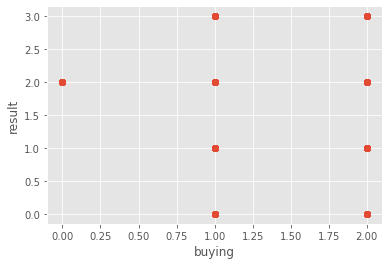

In [74]:

style.use("ggplot")
plt.scatter(person,cls)
plt.xlabel("buying")
plt.ylabel('result')

In [133]:
# # save and load the trained model with pickle
# with open('car_trained.pickle', 'wb') as handle:
#     pickle.dump(model, handle, protocol=pickle.HIGHEST_PROTOCOL)

# with open('car_trained.pickle', 'rb') as handle:
#     b = pickle.load(handle)
b.predict([x_test[0]])

array([2])

In [145]:
# delete the kernel may increase or decrease the model dramatically
for _ in range(20):
    x_train, x_test, y_train, y_test = model_selection.train_test_split(x,y,test_size =0.15)
    cls = svm.SVC(kernel = "linear", C=2)
    cls.fit(x_train,y_train)
    y_predict = cls.predict(x_test)
    b = cls.score(x_test,y_test)
    # using metrics to calculate the result score
    c = metrics.accuracy_score(y_test,y_predict)
    print(c)

0.7538461538461538
0.7115384615384616
0.6846153846153846
0.75
0.6846153846153846
0.7192307692307692
0.7538461538461538
0.7192307692307692
0.7346153846153847
0.7692307692307693
0.7230769230769231
0.7576923076923077
0.7153846153846154
0.7461538461538462
0.7576923076923077
0.7346153846153847
0.7115384615384616
0.7230769230769231
0.7346153846153847
0.7461538461538462
